# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker_gaussian_process import plot_maker_3d

## 2. Importing Data

In [2]:
# get all the red ball data
X_rec_1 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h10m.csv', decimal='.', delimiter=',')
X_rec_2 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h14m.csv', decimal='.', delimiter=',')
X_rec_3 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h19m.csv', decimal='.', delimiter=',')
X_rec_4 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h20m.csv', decimal='.', delimiter=',')
X_rec_5 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h21m.csv', decimal='.', delimiter=',')
X_rec_6 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h24m.csv', decimal='.', delimiter=',')
X_rec_7 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h25m.csv', decimal='.', delimiter=',')
X_rec_8 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h26m.csv', decimal='.', delimiter=',')
X_rec_9 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h28m.csv', decimal='.', delimiter=',')
X_rec_10 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h30m.csv', decimal='.', delimiter=',')
X_rec_11 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h31m.csv', decimal='.', delimiter=',')
X_rec_12 = pd.read_csv('../data-5cams/red_ball_coordinates_128px_2024-03-17_19h32m.csv', decimal='.', delimiter=',')
X_rec_1.shape, X_rec_2.shape, X_rec_3.shape, X_rec_4.shape, X_rec_5.shape, X_rec_6.shape, X_rec_7.shape, X_rec_8.shape, X_rec_9.shape, X_rec_10.shape, X_rec_11.shape, X_rec_12.shape

((1025, 10),
 (1007, 10),
 (1018, 10),
 (1021, 10),
 (992, 10),
 (1011, 10),
 (1002, 10),
 (1018, 10),
 (961, 10),
 (1020, 10),
 (1022, 10),
 (1010, 10))

In [3]:
# get all the position data
y_rec_1 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h10m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_2 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h14m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_3 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h19m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_4 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h20m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_5 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h21m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_6 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h24m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_7 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h25m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_8 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h26m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_9 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h28m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_10 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h30m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_11 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h31m.csv', decimal='.', delimiter=',').iloc[4:]
y_rec_12 = pd.read_csv('../data-5cams/positions_xyz_2024-03-17_19h32m.csv', decimal='.', delimiter=',').iloc[4:]


#### 2.1 Check for Missing Values in all input data

In [4]:
print(f'The amount of NaN values in X_rec_1: {X_rec_1.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_2: {X_rec_2.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_3: {X_rec_3.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_4: {X_rec_4.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_5: {X_rec_5.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_6: {X_rec_6.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_7: {X_rec_7.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_8: {X_rec_8.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_9: {X_rec_9.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_10: {X_rec_10.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_11: {X_rec_11.isna().sum().sum()}')
print(f'The amount of NaN values in X_rec_12: {X_rec_12.isna().sum().sum()}')

The amount of NaN values in X_rec_1: 44
The amount of NaN values in X_rec_2: 8
The amount of NaN values in X_rec_3: 6
The amount of NaN values in X_rec_4: 86
The amount of NaN values in X_rec_5: 0
The amount of NaN values in X_rec_6: 22
The amount of NaN values in X_rec_7: 4086
The amount of NaN values in X_rec_8: 4196
The amount of NaN values in X_rec_9: 722
The amount of NaN values in X_rec_10: 0
The amount of NaN values in X_rec_11: 20
The amount of NaN values in X_rec_12: 12


All the input datasets dont have to many NaN only rec_7 and rec_8 have too many so i will try to interpolate the data
1. Something is wrong with rec_7, the ball was outside of the building, so i just used the first 300 rows
2. in rec_8 the ball also goes outside of the building, so i just used the first 300 rows

In [5]:
X_rec_7 = X_rec_7.iloc[:300]
X_rec_8 = X_rec_8.iloc[:300]
y_rec_7 = y_rec_7.iloc[:300]
y_rec_8 = y_rec_8.iloc[:300]
X_rec_7.shape, X_rec_8.shape

((300, 10), (300, 10))

### 2.3 Combine all the datasets

In [6]:
X_train = pd.concat([X_rec_1, X_rec_2, X_rec_3, X_rec_4, X_rec_5, X_rec_6, X_rec_7, X_rec_8, X_rec_9, X_rec_10]) #, X_rec_11, X_rec_12])
y_train = pd.concat([y_rec_1, y_rec_2, y_rec_3, y_rec_4, y_rec_5, y_rec_6, y_rec_7, y_rec_8, y_rec_9, y_rec_10])#, y_rec_11, y_rec_12])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [7]:
X_train.shape, y_train.shape

((8655, 10), (8655, 3))

In [8]:
combined = pd.concat([X_train, y_train], axis=1)

## 3. Data Preprocessing

In [9]:
# check for missing values
print(f'The data has missing values: {combined.isnull().sum().sum()}')
combined.dropna(inplace=True)
print(f'The data has missing values: {combined.isnull().sum().sum()}')

The data has missing values: 952
The data has missing values: 0


In [10]:
X = combined.iloc[:, :10]
y = combined.iloc[:, 10:]

In [11]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [12]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [13]:
model = MLPRegressor(solver='adam', max_iter=20000, learning_rate_init=0.001, learning_rate='adaptive', hidden_layer_sizes=(50,100,50), early_stopping=True, alpha=0.01, activation='tanh')

In [14]:
param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50)  ,(100,), (64, 32, 64)],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

#random_search.fit(X_scaled, y_scaled)

In [15]:
#print(f'Best parameters: {random_search.best_params_}')
#print(f'Best score: {random_search.best_score_}')

In [16]:
#model = random_search.best_estimator_

## 5. Training the Model

In [17]:
model.fit(X_scaled, y_scaled)

MLPRegressor(activation='tanh', alpha=0.01, early_stopping=True,
             hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
             max_iter=20000)

## 6. Make Predictions On Test Data

In [18]:
import pandas as pd

In [19]:
X_test_11 = X_rec_11
y_test_11 = y_rec_11
X_test_11.shape, y_test_11.shape

((1022, 10), (1022, 3))

In [20]:
X_test_12 = X_rec_12
y_test_12 = y_rec_12
X_test_12.shape, y_test_12.shape

((1010, 10), (1010, 3))

In [21]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    #y_test_val = y_test_val.iloc[4:]
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :10]
    y_val = combined_test.iloc[:, 10:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [22]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

In [23]:
X_test_11_scaled, y_test_11 = prepare_and_scale_test_data(X_test_11, y_test_11, scaler_x)

Mean Squared Error on Test Data Set: 0.6480601943505201
Mean Absolute Error on Test Data Set: 0.5031999294732409
R2 Score on Test Data set: 0.8455430005430896


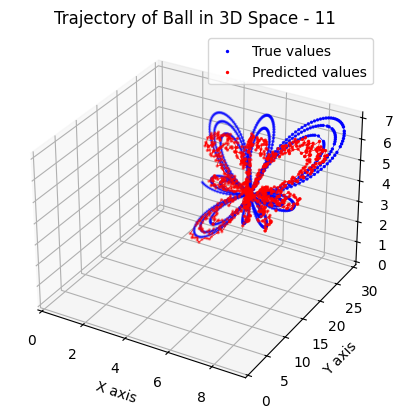

In [24]:
X_test_spiral_pred, mse_spiral, mae_spiral, r2_spiral = predict_evaluate_plot(X_test_11_scaled, y_test_11, model, scaler_y, title='Trajectory of Ball in 3D Space - Butterfly Motion')

Mean Squared Error on Test Data Set: 0.48321884299855006
Mean Absolute Error on Test Data Set: 0.5417307118612104
R2 Score on Test Data set: 0.5894916274834572


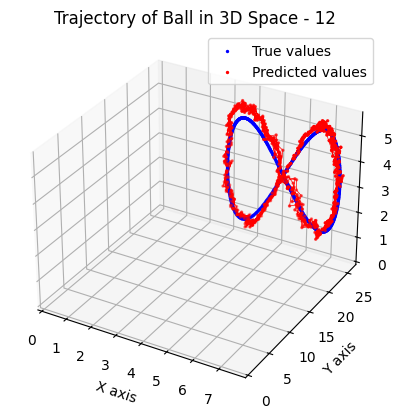

In [25]:
X_test_12_scaled, y_test_12 = prepare_and_scale_test_data(X_test_12, y_test_12, scaler_x)
X_test_12_pred, mse_12, mae_12, r2_12 = predict_evaluate_plot(X_test_12_scaled, y_test_12, model, scaler_y, title='Trajectory of Ball in 3D Space - 8 motion')